In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

root = '../data/raw'
csvs = sorted([os.path.join(root, i) for i in os.listdir(root)])
print(csvs)

df = pd.concat([pd.read_csv(i) for i in csvs]).reset_index(drop=True)
df

['../data/raw/exp01-raw.csv', '../data/raw/exp02-raw.csv', '../data/raw/exp03-raw.csv', '../data/raw/exp04-raw.csv', '../data/raw/exp05-raw.csv']


/tmp/ipykernel_36417/71244514.py:10: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(i) for i in csvs]).reset_index(drop=True)


,index,SrcPlate,Cpd,SrcWell,Destination Plate Name,DestWell,Transfer Volume /nl,dest_plate,actual_vol,Well,...,791,792,793,794,795,796,797,798,799,800
0,0.0,src racks 0..4,S1005,A1,dest racks 0..4 0,A1,20.0,plate_1,20.0,A1,...,0.047,0.045,0.047,0.047,0.048,0.046,0.046,0.047,0.045,0.045
1,160.0,src racks 0..4,S1021,I1,dest racks 0..4 0,B1,20.0,plate_1,20.0,B1,...,0.046,0.046,0.047,0.045,0.045,0.045,0.045,0.046,0.045,0.045
2,20.0,src racks 0..4,S1028,A3,dest racks 0..4 0,C1,20.0,plate_1,20.0,C1,...,0.047,0.046,0.047,0.046,0.046,0.045,0.046,0.046,0.045,0.046
3,180.0,src racks 0..4,S1039,I3,dest racks 0..4 0,D1,20.0,plate_1,20.0,D1,...,0.046,0.044,0.046,0.045,0.046,0.046,0.046,0.045,0.045,0.043
4,25.0,src racks 0..4,S1046,A5,dest racks 0..4 0,E1,20.0,plate_1,20.0,E1,...,0.038,0.038,0.039,0.037,0.038,0.038,0.037,0.037,0.037,0.036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L24,...,0.030,0.029,0.029,0.029,0.030,0.031,0.031,0.031,0.029,0.029
57596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M24,...,0.031,0.030,0.030,0.030,0.031,0.032,0.032,0.032,0.030,0.030
57597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N24,...,0.031,0.030,0.030,0.031,0.031,0.032,0.032,0.032,0.029,0.030
57598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O24,...,0.030,0.031,0.031,0.031,0.031,0.032,0.032,0.033,0.031,0.031


In [2]:
def get_experiment(df, 
                   protein, 
                   compound):
    test = df.loc[df['Cpd'] == compound,:].loc[df['protein'] == protein,:]
    ctrl = df.loc[df['Cpd'] == compound,:].loc[df['protein'].isna(),:]
    return test, ctrl

def get_traces(df):
    traces = df.loc[:,'300':]
    traces.columns = traces.columns.astype(int)
    traces.index = df['Well']
    return traces

test, ctrl = get_experiment(df=df,
                            protein='BM3 Heme WT',
                            compound='S1005',
                            )
test

,index,SrcPlate,Cpd,SrcWell,Destination Plate Name,DestWell,Transfer Volume /nl,dest_plate,actual_vol,Well,...,791,792,793,794,795,796,797,798,799,800
0,0.0,src racks 0..4,S1005,A1,dest racks 0..4 0,A1,20.0,plate_1,20.0,A1,...,0.047,0.045,0.047,0.047,0.048,0.046,0.046,0.047,0.045,0.045
16,1.0,src racks 0..4,S1005,A1,dest racks 0..4 0,A2,212.5,plate_1,212.5,A2,...,0.050,0.049,0.049,0.050,0.050,0.049,0.050,0.050,0.048,0.048
32,2.0,src racks 0..4,S1005,A1,dest racks 0..4 0,A3,605.0,plate_1,605.0,A3,...,0.038,0.038,0.040,0.040,0.041,0.041,0.040,0.039,0.038,0.037
48,3.0,src racks 0..4,S1005,A1,dest racks 0..4 0,A4,1202.5,plate_1,1202.5,A4,...,0.036,0.036,0.038,0.036,0.038,0.038,0.037,0.037,0.035,0.035
64,4.0,src racks 0..4,S1005,A1,dest racks 0..4 0,A5,2000.0,plate_1,2000.0,A5,...,0.039,0.037,0.039,0.038,0.040,0.041,0.039,0.039,0.038,0.038


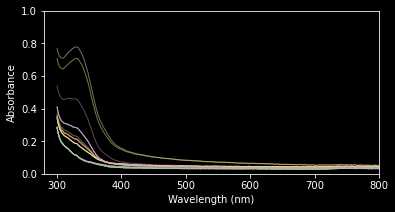

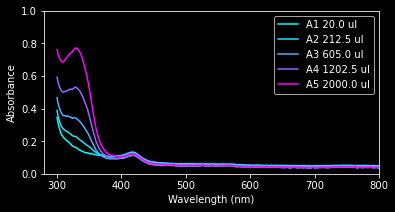

In [3]:
import sxfst

sxfst.plotTraces(get_traces(ctrl).reset_index(drop=True)
                 ,
                 size=(6,3))
sxfst.plotTraces(get_traces(test),
                 vols=test['actual_vol'],
                 size=(6,3))

In [4]:
img_paths = [i for i in sxfst.find('../data/lib/img') if 'png' in i]

In [5]:
df.columns[:20]

Index(['index', 'SrcPlate', 'Cpd', 'SrcWell', 'Destination Plate Name',
       'DestWell', 'Transfer Volume /nl', 'dest_plate', 'actual_vol', 'Well',
       'protein', 'date', 'id1', 'id2', 'machine', 'path', 'test_run_no',
       'time', 'user', '220'],
      dtype='object')

In [58]:
def get_blank_wells(df, sample):
    prot = sample['protein'].unique()
    assert len(prot) == 1, f'{prot}'
    prot = prot[0]
    
    well_row = sample['Well'].str.extract('([A-Z])')[0].unique()
    assert len(well_row) == 1, f'{well_row}'
    well_row = well_row[0]
    
    test_run_no = sample['test_run_no'].unique()
    #assert len(test_run_no) == 1
    test_run_no = test_run_no[0]
    #date = sample['date'].unique()
    #assert len(date) == 1, f'{date}'
    #date = date[0]
    #
    #path = sample['path'].unique()
    #assert len(path) == 1, f'{path}'
    #path = path[0]
    
    x = df.loc[df['test_run_no'] == test_run_no, :]
    x = x.loc[x['Cpd'].isna(), :]
    x = x.loc[x['Well'].str.contains(well_row), ]
    #if len(x) > 1:
    #    x = x.iloc[[0],:]
    return x
    
get_blank_wells(df, test)
get_blank_wells(df, ctrl)

,index,SrcPlate,Cpd,SrcWell,Destination Plate Name,DestWell,Transfer Volume /nl,dest_plate,actual_vol,Well,...,791,792,793,794,795,796,797,798,799,800
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A6,...,0.026,0.025,0.027,0.026,0.028,0.029,0.028,0.025,0.024,0.024
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A12,...,0.043,0.041,0.042,0.040,0.042,0.042,0.042,0.043,0.040,0.040
272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A18,...,0.046,0.046,0.047,0.046,0.046,0.044,0.045,0.047,0.045,0.045
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A24,...,0.049,0.048,0.049,0.047,0.047,0.047,0.048,0.048,0.046,0.048
464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A6,...,0.034,0.033,0.033,0.033,0.033,0.033,0.032,0.032,0.033,0.033
560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A12,...,0.034,0.035,0.036,0.033,0.033,0.035,0.034,0.034,0.033,0.034
656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A18,...,0.033,0.032,0.031,0.031,0.031,0.031,0.032,0.031,0.030,0.032
752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A24,...,0.033,0.034,0.033,0.033,0.032,0.034,0.032,0.032,0.032,0.031


In [59]:
def plotTraces(x,     # df
               ax,
               save_path=None,
               title=None,   # name
               concs=None,  #
               save=False,
               size=(12,8),
               ylim=(-0.1,0.5),
               **kwargs,
               ):
    if concs is not None:
        for row_, conc_ in zip(x.index, concs):
            ax.plot(x.loc[row_,:],
                     c=plt.cm.cool(conc_/max(concs)),
                     label=f'{round(conc_,2)} uM')
    else:
        for row_ in x.index:
            ax.plot(x.loc[row_,:],
                     label=f'{row_}',
                     **kwargs,
                     )
    ax.set_xlim(280,800)
    ax.set_ylim(*ylim)
    if title is not None:
        ax.set_title(title)
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('Absorbance')
    ax.legend(loc='center right')
    return ax
    #if save or save_path is not None:
    #    if save_path is not None:
    #        plt.savefig(os.path.join('img', f'{save_path}.png'))
    #    else:
    #        plt.savefig(os.path.join('img', f'{cpd}.png'))
    #    plt.close()
    #else:
    #    plt.show()

In [60]:
from scipy.optimize import curve_fit

def mm(x, vmax, km):
    return ((x * vmax) / (km + x))


def r_squared(yi,yj):
    residuals = yi - yj
    sum_sq_residual = sum(residuals ** 2)
    sum_sq_total = sum((yi - yi.mean()) ** 2) # check this!!!
    return 1 - (sum_sq_residual / sum_sq_total)

def get_mm(x,y):
    #y = y.replace(np.inf, 0) # error handling - pandas
    try:
        (km, vmax), covariance = curve_fit(mm, x, y,
                bounds=((0, 0),(1e4,0.5)),
                p0 = (1e4, 0))
    except RuntimeError:
        km, vmax = np.inf, np.inf

    yh = mm(x, km, vmax)
    rsq = r_squared(y, yh)
    return {'km':round(km,2), 'vmax':round(vmax,2), 'rsq':round(rsq,2)}


def plot_mm(ax,
            x,
            y,
            km,
            vmax,
            title,
           ):
    ax.scatter(x,y)
    xx = np.linspace(min(x),max(x), 64)
    yy = mm(xx, vmax, km)
    ax.plot(xx, yy)
    ax.set_xlabel('Concenctration uM')
    ax.set_ylabel('Response')
    ax.set_title(title)

  0%|                                                                                                                                   | 0/822 [00:00<?, ?it/s]

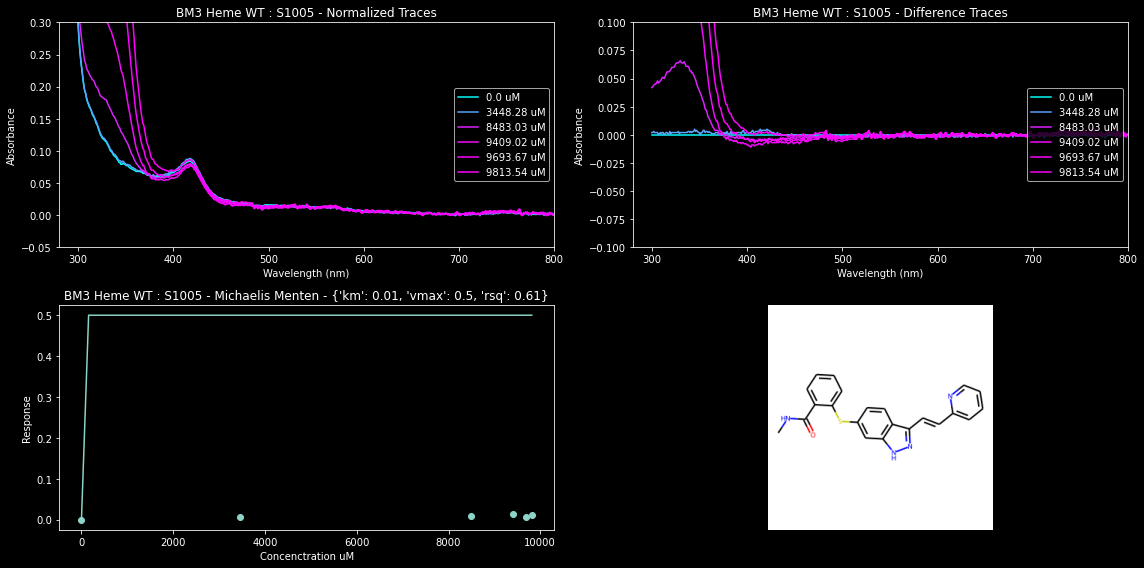

  0%|                                                                                                                                   | 0/822 [00:00<?, ?it/s]


In [106]:
from tqdm import tqdm
from PIL import Image

for i in df['protein'].unique():
    for j in tqdm(df['Cpd'].dropna().unique()):
        test, ctrl = get_experiment(df, i, j)
        test_run_no = test['test_run_no'].unique()
        assert len(test_run_no) == 1
        test_run_no = test_run_no[0]
        ctrl = ctrl.loc[ctrl['test_run_no'] == test_run_no, :]
        
        if len(test) > 0:
            test_traces = get_traces(test)
            protein_blanks = get_blank_wells(df, test)
            protein_blanks_traces = get_traces(protein_blanks)
            # get most similar at A400 - come back to this
            #  [abs(protein_blanks_traces.loc[idx, 400].mean() - test_traces.loc[:,400].mean()) for idx in protein_blanks_traces.index]
            similarity = sorted(range(len(protein_blanks_traces)),
                                key=lambda idx : abs(protein_blanks_traces.iloc[idx, 400].mean() - test_traces.iloc[:,400].mean()))
            protein_blanks_trace = protein_blanks_traces.iloc[[similarity[0]],:]
            
            test_traces = pd.concat([protein_blanks_trace,
                                     test_traces],
                                   axis=0)
            
            control_blanks = get_blank_wells(df, ctrl)
            control_blanks_traces = get_traces(control_blanks)
            control_blanks_trace = control_blanks_traces.loc[[control_blanks_traces.index[0]],:]
            ctrl_traces = pd.concat([control_blanks_trace,
                                     get_traces(ctrl)],
                                     axis=0)
            vols = [0] + test['actual_vol'].to_list()
            concs = np.array([sxfst.data.c2(v1=i,      # vol
                                            c1=10_000, # stock conc - uM
                                            v2=38 + i, # total vol
                                            )
                                 for i in vols])

            test_traces_norm = sxfst.data.norm_traces(test_traces)
            test_traces_smooth = sxfst.data.smooth(test_traces_norm)
            diff = test_traces_smooth - test_traces_smooth.iloc[0,:]
            response = sxfst.data.response(diff)
            mm_fit = get_mm(np.array(concs), response.values)
            
            
            fig, ax = plt.subplots(2,2, figsize=(16,8))
            plotTraces(test_traces_smooth,
                       concs=concs,
                       ylim=(-0.05, 0.3),
                       size=(8,3),
                       ax=ax[0,0],
                       title=f'{i} : {j} - Normalized Traces',
                       )
            plotTraces(diff,
                       concs=concs,
                       ylim=(-0.1,0.1),
                       size=(8,3),
                       ax=ax[0,1],
                       title=f'{i} : {j} - Difference Traces',
                       )
            
            plot_mm(ax[1,0],
                    x=concs,
                    y=response,
                    km=mm_fit['km'],
                    vmax=mm_fit['vmax'],
                    title=f'{i} : {j} - Michaelis Menten - {mm_fit}',
                   )
            cpd_img = Image.open(next(filter(lambda s : j in s,
                                             img_paths)))
            ax[1,1].imshow(cpd_img)
            ax[1,1].axis('off')
            plt.tight_layout()
            plt.show()
            
            output_data = {'cpd': j,
                           'protein' : i,
                           **mm_fit}
        break
    break
        
                

In [107]:
#protein_blanks_traces.loc[similarity[0],:]

#pd.concat([protein_blanks_trace,
#           test_traces],
#           axis=1)
output_data

{'cpd': 'S1005',
 'protein': 'BM3 Heme WT',
 'km': 0.01,
 'vmax': 0.5,
 'rsq': 0.61}

In [95]:
concs

array([   0.        , 3448.27586207, 8483.03393214, 9409.02021773,
       9693.67190649, 9813.54268891])

In [100]:
test_traces

,0,300,301,302,303,304,305,306,307,308,...,791,792,793,794,795,796,797,798,799,800
300,0.339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,0.314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,0.294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,0.279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,0.266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1,NaN,0.346,0.321,0.302,0.286,0.273,0.261,0.249,0.239,0.235,...,0.047,0.045,0.047,0.047,0.048,0.046,0.046,0.047,0.045,0.045
A2,NaN,0.389,0.365,0.346,0.332,0.319,0.308,0.298,0.288,0.284,...,0.050,0.049,0.049,0.050,0.050,0.049,0.050,0.050,0.048,0.048
A3,NaN,0.467,0.443,0.425,0.412,0.399,0.388,0.379,0.370,0.366,...,0.038,0.038,0.040,0.040,0.041,0.041,0.040,0.039,0.038,0.037
A4,NaN,0.593,0.571,0.554,0.542,0.530,0.522,0.514,0.508,0.505,...,0.036,0.036,0.038,0.036,0.038,0.038,0.037,0.037,0.035,0.035


In [88]:
protein_blanks_traces

,300,301,302,303,304,305,306,307,308,309,...,791,792,793,794,795,796,797,798,799,800
Well,,,,,,,,,,,,,,,,,,,,,
A6,0.315,0.290,0.271,0.257,0.242,0.230,0.217,0.206,0.201,0.193,...,0.026,0.025,0.027,0.026,0.028,0.029,0.028,0.025,0.024,0.024
A12,0.339,0.314,0.294,0.279,0.266,0.254,0.242,0.234,0.229,0.221,...,0.043,0.041,0.042,0.040,0.042,0.042,0.042,0.043,0.040,0.040
A18,0.364,0.338,0.319,0.304,0.290,0.279,0.268,0.259,0.256,0.249,...,0.046,0.046,0.047,0.046,0.046,0.044,0.045,0.047,0.045,0.045
A24,0.364,0.340,0.321,0.306,0.293,0.281,0.271,0.262,0.259,0.252,...,0.049,0.048,0.049,0.047,0.047,0.047,0.048,0.048,0.046,0.048
A6,0.290,0.269,0.250,0.236,0.224,0.214,0.205,0.196,0.193,0.188,...,0.034,0.033,0.033,0.033,0.033,0.033,0.032,0.032,0.033,0.033
A12,0.292,0.270,0.253,0.239,0.227,0.216,0.207,0.201,0.197,0.191,...,0.034,0.035,0.036,0.033,0.033,0.035,0.034,0.034,0.033,0.034
A18,0.299,0.277,0.258,0.244,0.231,0.221,0.213,0.204,0.200,0.194,...,0.033,0.032,0.031,0.031,0.031,0.031,0.032,0.031,0.030,0.032
A24,0.289,0.267,0.249,0.236,0.225,0.215,0.206,0.198,0.195,0.189,...,0.033,0.034,0.033,0.033,0.032,0.034,0.032,0.032,0.032,0.031


In [68]:
idx = protein_blanks_traces.index


-0.026250000000000006

In [37]:
np.reresponse.values

array([0.   , 0.049, 0.035, 0.03 , 0.037, 0.055])

In [27]:
test.columns[:20]

Index(['index', 'SrcPlate', 'Cpd', 'SrcWell', 'Destination Plate Name',
       'DestWell', 'Transfer Volume /nl', 'dest_plate', 'actual_vol', 'Well',
       'protein', 'date', 'id1', 'id2', 'machine', 'path', 'test_run_no',
       'time', 'user', '220'],
      dtype='object')

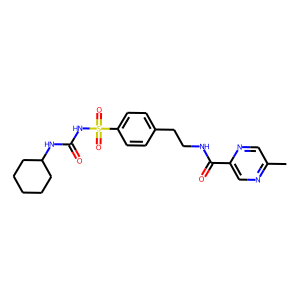

In [23]:
from PIL import Image
Image.open(img_paths[0])

In [ ]:
plt.Subplot(fig=fig)

In [ ]:
def sub(a, b):
    return pd.DataFrame(a.values - b.values,
                        columns=a.columns,
                        index=a.index)


plotTraces(control_blanks_trace,
           concs=concs,
           ylim=(-0.1,0.1),
           size=(8,3),
          )
plotTraces(sub(test_traces, control_blanks_trace),
           concs=concs,
           ylim=(-0.1,0.1),
           size=(8,3),
          )

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(vols,response)